# Collision Dataset Classification Problem


## Importing libraries for data manipulation, cleaning, visualization and training

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv('~/Desktop/IBM_CAPSTONE_Project/Data-Collisions.csv', low_memory=False);

In [3]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
df.shape

(194673, 38)

In [5]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
df_severity=df['SEVERITYCODE'].value_counts().to_frame()

## Different plots to visualize the data attributes
### Plot to visualize the number of collision where no injury ('1') to injury ('2')

<AxesSubplot:>

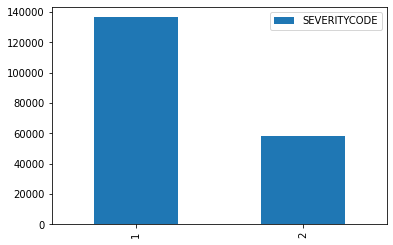

In [7]:
df_severity.plot(kind='bar')

### Visualizing the road conditions reported for collisions

<AxesSubplot:>

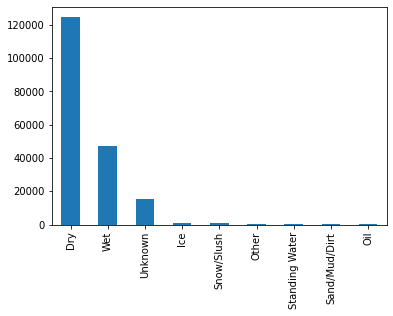

In [158]:
df['ROADCOND'].value_counts().plot(kind='bar')


### Visualizing the light conditions during collision

<AxesSubplot:>

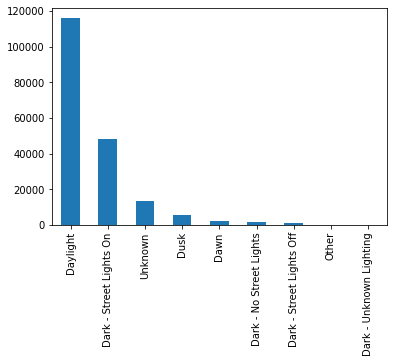

In [159]:

df['LIGHTCOND'].value_counts().plot(kind='bar')

<AxesSubplot:>

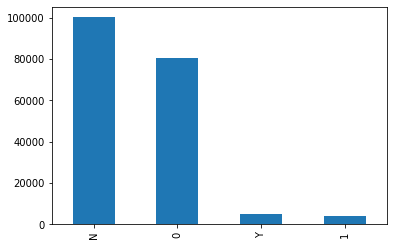

In [137]:
df['UNDERINFL'].value_counts().plot(kind='bar')

<AxesSubplot:>

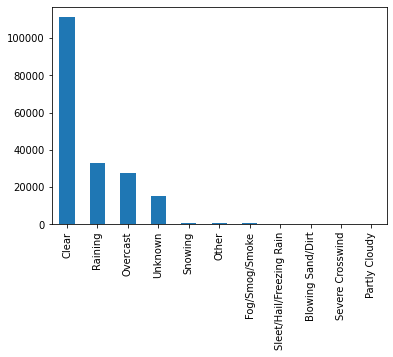

In [5]:
df['WEATHER'].value_counts().plot(kind='bar')

<AxesSubplot:>

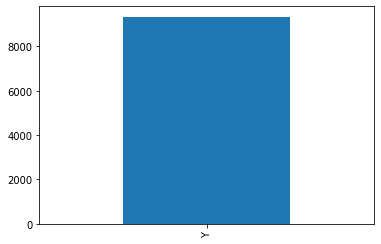

In [12]:
df['SPEEDING'].value_counts().plot(kind='bar')

#print(df['SPEEDING'].value_counts()).plot(kind='bar')
#print(df['INATTENTIONIND'].value_counts()).plot(kind='bar')
#print(df['UNDERINFL'].value_counts()).plot(kind='bar')

<AxesSubplot:>

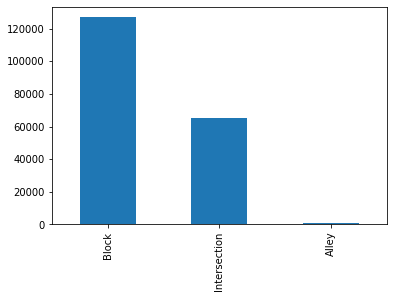

In [8]:
df['ADDRTYPE'].value_counts().plot(kind='bar')

<AxesSubplot:>

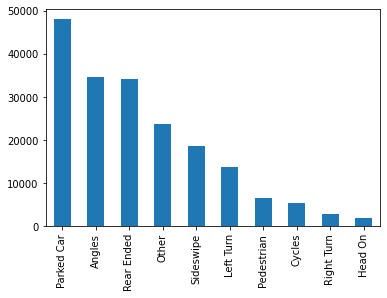

In [9]:
df['COLLISIONTYPE'].value_counts().plot(kind='bar')

<AxesSubplot:>

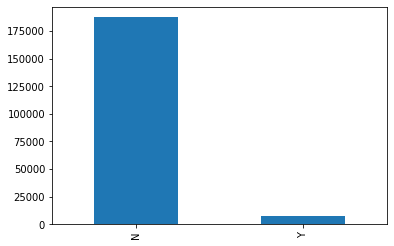

In [10]:
df['HITPARKEDCAR'].value_counts().plot(kind='bar')

## Finding the number of missing values in the dataset

In [11]:
missing_data = df.isnull()

In [12]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

Keeping the SPEEDING attribute and removing the missing entries

In [20]:
#df.dropna(subset = ["ADDRTYPE","COLLISIONTYPE","HITPARKEDCAR","PEDCYLCOUNT","VEHCOUNT","PERSONCOUNT","SPEEDING","WEATHER","ROADCOND","LIGHTCOND","INATTENTIONIND","UNDERINFL"], inplace=True)
#df.reset_index(drop=True, inplace=True)
#df.shape

(688, 38)

### Removing the SPEEDING attribute and removing the missing entries

In [22]:
df.dropna(subset = ["ADDRTYPE","COLLISIONTYPE","HITPARKEDCAR","PEDCYLCOUNT","VEHCOUNT","PERSONCOUNT","WEATHER","ROADCOND","LIGHTCOND","INATTENTIONIND","UNDERINFL"], inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(29588, 38)

## Perform under-sampling to balance the dataset for the ML algorithms

In [23]:
# Class count
count_class_1, count_class_2 = df['SEVERITYCODE'].value_counts()
# Divide by class
df_class_1 = df[df['SEVERITYCODE'] == 1]
df_class_2 = df[df['SEVERITYCODE'] == 2]

df_class_1_under = df_class_1.sample(count_class_2)
df_test_under = pd.concat([df_class_1_under, df_class_2], axis=0)
print('Random under-sampling:')
print(df_test_under['SEVERITYCODE'].value_counts())

Random under-sampling:
2    10357
1    10357
Name: SEVERITYCODE, dtype: int64


## Select a handful of features to train the model

In [24]:
df_set1=df_test_under[{"SEVERITYCODE","ADDRTYPE","COLLISIONTYPE","HITPARKEDCAR","PEDCYLCOUNT","VEHCOUNT","PERSONCOUNT","WEATHER","ROADCOND","LIGHTCOND","INATTENTIONIND","UNDERINFL"}]

In [25]:
df_set1.shape

(20714, 12)

Selecting SEVERITYCODE as Y label for training a model

In [26]:
Y=df_set1["SEVERITYCODE"]
print(df_set1["SEVERITYCODE"].value_counts())

2    10357
1    10357
Name: SEVERITYCODE, dtype: int64


The Training Set

In [27]:
X=df_set1[["HITPARKEDCAR","ADDRTYPE","COLLISIONTYPE","PEDCYLCOUNT","VEHCOUNT","PERSONCOUNT","INATTENTIONIND","UNDERINFL"]].values

In [28]:
X.shape

(20714, 8)

In [30]:
X[0]

array(['N', 'Intersection', 'Parked Car', 0, 2, 3, 'Y', 'N'], dtype=object)

### Converting Categorical Values to dummy/indicator variables

In [31]:
from sklearn import preprocessing
le_yesno = preprocessing.LabelEncoder()
le_yesno.fit(['Y','N'])
X[:,0] = le_yesno.transform(X[:,0])

In [33]:
le_addrtype = preprocessing.LabelEncoder()
le_addrtype.fit(['Block','Intersection','Alley']) 
X[:,1] = le_addrtype.transform(X[:,1]) 

In [34]:
le_coltype = preprocessing.LabelEncoder()
le_coltype.fit(['Parked Car','Angles','Rear Ended','Other','Sideswipe','Left Turn','Pedestrian','Cycles','Right Turn','Head On']) 
X[:,2] = le_coltype.transform(X[:,2]) 

In [35]:
le_inattention = preprocessing.LabelEncoder()
le_inattention.fit(['Y'])
X[:,6] = le_inattention.transform(X[:,6])

In [36]:
le_uinfluence = preprocessing.LabelEncoder()
le_uinfluence.fit(['Y','0','N','1'])
X[:,7] = le_uinfluence.transform(X[:,7])

### Using Logistic Regression as it is a binary classification problem

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (16571, 8) (16571,)
Test set: (4143, 8) (4143,)


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.0001, solver='liblinear').fit(X_train,y_train)
LR
yhat = LR.predict(X_test)
from sklearn import metrics
print("LR's Train set Accuracy: ", metrics.accuracy_score(y_train,LR.predict(X_train)))
print("LR's Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

LR's Train set Accuracy:  0.5734113813288275
LR's Test set Accuracy:  0.5655322230267922


In [43]:
from sklearn.metrics import classification_report, confusion_matrix

### Classification Results using LR

In [44]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.56      0.64      0.60      2083
           2       0.57      0.49      0.53      2060

    accuracy                           0.57      4143
   macro avg       0.57      0.57      0.56      4143
weighted avg       0.57      0.57      0.56      4143



### Applying SVM Classifier

In [45]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [46]:
yhat = clf.predict(X_test)
print("SVM's Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("SVM's Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

SVM's Train set Accuracy:  0.6812503771649266
SVM's Test set Accuracy:  0.6620806179097273


### Classification Results using SVM

In [47]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.71      0.55      0.62      2083
           2       0.63      0.77      0.70      2060

    accuracy                           0.66      4143
   macro avg       0.67      0.66      0.66      4143
weighted avg       0.67      0.66      0.66      4143



### Decision Trees

In [65]:
from sklearn.tree import DecisionTreeClassifier
car_collision = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
car_collision # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [66]:
car_collision.fit(X_train,y_train)
yhat = car_collision.predict(X_test)

print("DecisionTree's Train set Accuracy: ", metrics.accuracy_score(y_train, car_collision.predict(X_train)))
print("DecisionTrees's Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

DecisionTree's Train set Accuracy:  0.7005612214108986
DecisionTrees's Test set Accuracy:  0.6739077962828868


In [67]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.72      0.57      0.64      2083
           2       0.64      0.78      0.70      2060

    accuracy                           0.67      4143
   macro avg       0.68      0.67      0.67      4143
weighted avg       0.68      0.67      0.67      4143



### K-Nearest Neighbor

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
k = 2
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print("KNN's Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("KNN's Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

KNN's Train set Accuracy:  0.6454046225333414
KNN's Test set Accuracy:  0.6224957760077239


In [70]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.62      0.66      0.64      2083
           2       0.63      0.58      0.61      2060

    accuracy                           0.62      4143
   macro avg       0.62      0.62      0.62      4143
weighted avg       0.62      0.62      0.62      4143

